# Compute the camera calibration matrix and distortion coefficients

All cameras use lenses and one of the problems with lenses is that they have some radial distortion. Removing Distortion can be achieved by finding the indside corners within an image and using that information to un-distort the image.

In [1]:
import numpy as np
import glob
import matplotlib.pyplot as plt
import cv2
import matplotlib.image as mpimg
import matplotlib.gridspec as gridspec

In [2]:
# number of inside corners in x&y direcctions
nx = 8
ny = 6

# prepare object points
objp = np.zeros((6*9, 3), np.float32)
objp[:, :2] = np.mgrid[0:9, 0:6].T.reshape(-1, 2)

# Arrays to store object points and image points from all the images
objpoints = []
imgpoints = []


In [3]:
# Make a list of calibration images
images = glob.glob("./camera_cal/Photo-*.jpeg")

plt.figure(figsize = (18,12))
grid = gridspec.GridSpec(5,4)
# set the spacing between axes.
grid.update(wspace=0.05, hspace=0.15)

<Figure size 1800x1200 with 0 Axes>

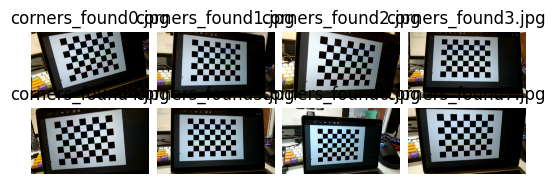

In [4]:
for idx, fname in enumerate(images):
    img = cv2.imread(fname)
    
    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    
    # Fint the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)
    
    # If found, add to object points, image points
    if ret:
        objpoints.append(objp)
        imgpoints.append(corners)
        
        # Draw and display the corners
        img = cv2.drawChessboardCorners(img, (nx, ny), corners, ret)
        write_name = 'corners_found'+str(idx)+'.jpg'
        #cv2.imwrite(write_name,img)
        img_plt = plt.subplot(grid[idx])
        plt.axis('on')
        img_plt.set_xticklabels([])
        img_plt.set_yticklabels([])
        #img_plt.set_aspect('equal')
        plt.imshow(img)
        plt.title(write_name)
        plt.axis('off')
        
plt.show()

In [5]:
# Take an image, object points, image points, and perform the camera calibration. Undistort the image after camera calibration
        
#load image for reference
image = cv2.imread('./camera_cal/Photo-1.jpeg')
img_size = (image.shape[1],image.shape[0])

# Perform camera calibration with the given object and image points
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_size, None, None)

# Save the camera calibration results for later use
dist_pickle = {}
dist_pickle["mtx"] = mtx
dist_pickle["dist"] = dist
pickle.dump(dist_pickle, open("calibration_pickle.p", "wb"))

#Visualize the before/after distortion on chessboard images
undist = cv2.undistort(image, mtx, dist, None, mtx)
plt.figure(figsize = (18,12))
grid = gridspec.GridSpec(1,2)
# set the spacing between axes.
grid.update(wspace=0.1, hspace=0.1)  

img_plt = plt.subplot(grid[0])
plt.imshow(image)
plt.title('Original Image')

img_plt = plt.subplot(grid[1])
plt.imshow(undist)
plt.title('Undistorted Image')

plt.show()

error: OpenCV(4.5.1) /tmp/pip-wheel-qd18ncao/opencv-python/opencv/modules/calib3d/src/calibration.cpp:3358: error: (-2:Unspecified error) in function 'void cv::collectCalibrationData(cv::InputArrayOfArrays, cv::InputArrayOfArrays, cv::InputArrayOfArrays, int, cv::Mat&, cv::Mat&, cv::Mat*, cv::Mat&)'
> Number of object and image points must be equal (expected: 'numberOfObjectPoints == numberOfImagePoints'), where
>     'numberOfObjectPoints' is 54
> must be equal to
>     'numberOfImagePoints' is 48


In [8]:
# Choose from the test images to demonstrate the before/after applying undistortion 
testImg = cv2.imread('./test_images/test5.jpg')
testImg = cv2.cvtColor(testImg, cv2.COLOR_BGR2RGB)

undistTest = cv2.undistort(testImg, mtx, dist, None, mtx)

#Visualize the before/after distortion on test images
plt.figure(figsize = (18,12))
grid = gridspec.GridSpec(1,2)
# set the spacing between axes.
grid.update(wspace=0.1, hspace=0.1)  

img_plt = plt.subplot(grid[0])
plt.imshow(testImg)
plt.title('Original test Image')

img_plt = plt.subplot(grid[1])
plt.imshow(undistTest)
plt.title('Undistorted test Image')


plt.show()

error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'
